# Sesión 14: Generative Adversarial Networks

---

Martes 7 de Noviembre de 2023

In [1]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import time
from IPython import display
from tensorflow.keras import layers

### Preparación de datos

In [3]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# Cambiar el tamaño (60000, 28, 28, 1)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') 

# Normalizar las imagenes a [-1, 1]
train_images = (train_images - 127.5) / 127.5

BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

### Red - Generador

In [5]:
def make_generator_model():
  model = tf.keras.Sequential()
  model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,))) # 12544
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Reshape((7, 7, 256))) # 7, 7, 256
  assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

  model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False)) # 7, 7, 128
  assert model.output_shape == (None, 7, 7, 128)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)) # 14, 14, 64
  assert model.output_shape == (None, 14, 14, 64)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False)) # 28, 28, 1
  assert model.output_shape == (None, 28, 28, 1)

  return model

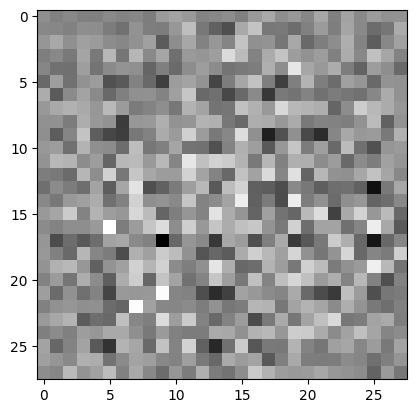

In [6]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
genereted_image = generator(noise, training=False)

plt.imshow(genereted_image[0, :, :, 0], cmap='gray')